<h1>Quantum Teleportation</h1>

<h2>Implementing in Qiskit</h2>

<h3>1) Setup</h3>

In [33]:
!pip install -U qiskit qiskit-aer


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


<h3>2) Choose Test States</h3>

In [5]:
import numpy as np

thetas = [0, np.pi/3, 2*np.pi/3, np.pi]
phis = [0, np.pi/2, np.pi, 3*np.pi/2]

<h3>3) Build Teleportation and Measurement Circuits</h3>

In [35]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

def state_prep(circ, q, theta, phi):
    circ.u(theta, phi, 0, q)

def teleportation(theta, phi):
    q = QuantumRegister(3, 'q')
    c = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(q, c)

    state_prep(qc, q[0], theta, phi)
    qc.h(q[1])
    qc.cx(q[1], q[2])

    qc.cx(q[0], q[1])
    qc.h(q[0])

    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])
        
    return qc

<h3>4) Create Measurement Circuits for Z, X, Y</h3>

In [36]:
from qiskit import ClassicalRegister

def measure_circuits(theta, phi):
    base = teleportation(theta, phi)
    circs = []

    # Z Measurement
    cz = base.copy()
    cz.add_register(ClassicalRegister(1,'m'))
    cz.measure(2, cz.clbits[-1])
    circs.append(("Z", theta, phi, cz))

    # X Measurement
    cx = base.copy()
    cx.h(2)
    cx.add_register(ClassicalRegister(1,'m'))
    cx.measure(2, cx.clbits[-1])
    circs.append(("X", theta, phi, cx))

    # Y Measurement
    cy = base.copy()
    cy.sdg(2)
    cy.h(2)
    cy.add_register(ClassicalRegister(1,'m'))
    cy.measure(2, cy.clbits[-1])
    circs.append(("Y", theta, phi, cy))

    return circs

<h3>5) Run Circuits on Simulator</h3>

In [37]:
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend("qasm_simulator")
shots = 4000

results_data = []

for th in thetas:
    for ph in phis:
        circs = measure_circuits(th, ph)
        for (axis, th, ph, circ) in circs:
            t = transpile(circ, backend)
            result = backend.run(t, shots=shots).result()
            counts = result.get_counts()
            results_data.append({
                "theta": float(th),
                "phi": float(ph),
                "axis": axis,
                "shots": shots,
                "counts": counts
            })

<h3>6) Create Table</h3>

In [38]:
import pandas as pd
df = pd.DataFrame(results_data)
df.to_json("teleportation_measurements.json", indent=2)
df.to_csv("teleportation_measurements.csv", index=False)
df

,theta,phi,axis,shots,counts
0,0.000000,0.000000,Z,4000,"{'1 11': 977, '0 01': 1020, '1 10': 1004, '0 0..."
1,0.000000,0.000000,X,4000,"{'1 01': 501, '0 00': 487, '0 10': 501, '1 00'..."
2,0.000000,0.000000,Y,4000,"{'1 01': 489, '0 11': 499, '1 11': 462, '1 00'..."
3,0.000000,1.570796,Z,4000,"{'1 11': 956, '1 10': 1050, '0 00': 999, '0 01..."
4,0.000000,1.570796,X,4000,"{'1 01': 477, '1 00': 519, '1 10': 508, '0 01'..."
5,0.000000,1.570796,Y,4000,"{'1 01': 490, '0 00': 493, '0 10': 477, '0 11'..."
6,0.000000,3.141593,Z,4000,"{'1 11': 965, '0 00': 1052, '1 10': 1003, '0 0..."
7,0.000000,3.141593,X,4000,"{'1 00': 499, '1 10': 522, '0 01': 484, '0 00'..."
8,0.000000,3.141593,Y,4000,"{'1 01': 487, '1 10': 484, '0 01': 524, '1 00'..."
9,0.000000,4.712389,Z,4000,"{'1 11': 995, '1 10': 985, '0 00': 1033, '0 01..."


<h2>Implementing on IBM Hardware</h2>

<h3>1) Setup</h3>

In [39]:
!pip install qiskit-ibm-runtime


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [40]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Run once to save token
QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token="AiUzYo64Y8yW7qLJyW0BxwWO0POI8lFH3B41qoR86_ni", overwrite=True)
service = QiskitRuntimeService()

qiskit_runtime_service.__init__:WARNING:2025-11-06 18:30:32,026: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


In [41]:
backend = service.least_busy(min_num_qubits=3, simulator=False)
print(backend.name)

qiskit_runtime_service.backends:WARNING:2025-11-06 18:30:32,204: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-06 18:30:32,918: Using instance: open-instance, plan: open


ibm_torino


<h3>2) Build Circuits</h3>

In [42]:
circuits_to_run = []
circuits_meta = []

for th in thetas:
    for ph in phis:
        for axis, th_c, ph_c, circ in measure_circuits(th, ph):
            circuits_to_run.append(circ)
            circuits_meta.append((axis, th_c, ph_c))

<h3>3) Transpile Circuits

In [50]:
from qiskit import transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

native_basis= list(backend.target.operation_names)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
tcircs = [pm.run(c) for c in circuits_to_run]

tcircs = transpile(tcircs, basis_gates=native_basis, backend=backend, optimization_level=3)

for i, c in enumerate(tcircs):
    bad_ops = {gate for gate in c.count_ops() if gate not in native_basis}
    if bad_ops:
        print(f"Circuit {i} still has unsupported ops:", bad_ops)

<h3>4) Run on Hardware</h3>

In [51]:
from qiskit_ibm_runtime import Session, SamplerV2

sampler = SamplerV2(mode=backend)
job = sampler.run(tcircs, shots=shots)
res = job.result()

<h3>5) Build Table</h3>

In [54]:
counts_list = []
for i in range(len(tcircs)):
    cnts = res[i].join_data().get_counts()
    counts_list.append(cnts)

import pandas as pd
results_data = []
for (axis, th, ph), counts in zip(circuits_meta, counts_list):
    results_data.append({
        "theta": float(th),
        "phi": float(ph),
        "axis": axis,
        "shots": shots,
        "counts": counts
    })

df = pd.DataFrame(results_data)
df.to_json("teleportation_measurements_hardware.json", indent=2)
df.to_csv("teleportation_measurements_hardware.csv", index=False)
df

,theta,phi,axis,shots,counts
0,0.000000,0.000000,Z,4000,"{'000': 954, '001': 948, '111': 886, '110': 85..."
1,0.000000,0.000000,X,4000,"{'111': 445, '001': 565, '100': 550, '101': 49..."
2,0.000000,0.000000,Y,4000,"{'101': 483, '111': 479, '011': 435, '001': 63..."
3,0.000000,1.570796,Z,4000,"{'100': 141, '111': 841, '001': 924, '101': 15..."
4,0.000000,1.570796,X,4000,"{'101': 517, '011': 423, '110': 444, '100': 51..."
5,0.000000,1.570796,Y,4000,"{'010': 413, '111': 518, '011': 398, '100': 51..."
6,0.000000,3.141593,Z,4000,"{'001': 952, '101': 130, '000': 945, '111': 87..."
7,0.000000,3.141593,X,4000,"{'000': 573, '100': 544, '101': 515, '111': 44..."
8,0.000000,3.141593,Y,4000,"{'101': 523, '110': 481, '011': 412, '010': 42..."
9,0.000000,4.712389,Z,4000,"{'110': 817, '111': 893, '000': 949, '001': 96..."


<h1>Visualization</h1>

In [2]:
!pip install qutip
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


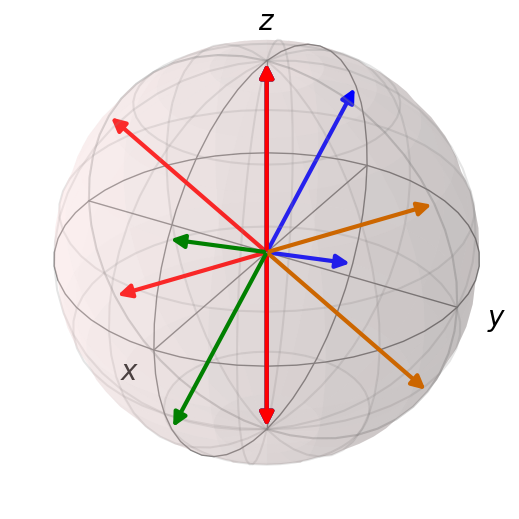

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, Qobj, basis

# Initialize Bloch sphere
b = Bloch()

# Compute and plot states
for th in thetas:
    for ph in phis:
        # Build |ψ(θ,φ)>
        psi = np.cos(th/2)*basis(2,0) + np.exp(1j*ph)*np.sin(th/2)*basis(2,1)
        psi = psi.unit()
        # Add state to Bloch sphere
        b.add_states(psi)

b.xlabel = ['$x$', '']
b.ylabel = ['$y$', '']
b.zlabel = ['$z$', '']
b.show()